In [2]:
import sympy as sp

In [3]:
from sympy.vector import Vector, CoordSys3D, Point

In [4]:
N = CoordSys3D('')

In [5]:
Ax, Ay, Bx, By, Cx, Cy, Dx, Dy = sp.symbols(('Ax', 'Ay', 'Bx', 'By', 'Cx', 'Cy', 'Dx', 'Dy'))
VAx, VAy, VDx, VDy, t_curr, t1, t2, delta_t,Acc_max,t = sp.symbols(('VAx', 'VAy', 'VDx', 'VDy', 't_curr', 't1', 't2', 'delta_t', 'Acc_max', 't'))

In [6]:
A = sp.Matrix([Ax, Ay])
VA = sp.Matrix([VAx, VAy])

D = sp.Matrix([Dx, Dy])
VD = sp.Matrix([VDx, VDy])

In [7]:
B = A + VA*(delta_t)/3
C = D - VD*(delta_t)/3

In [8]:
Traj = t**3*A + (1-t)*t**2*B + (1-t)**2*t*C + (1-t)**3*D
Traj

Matrix([
[Ax*t**3 + Dx*(1 - t)**3 + t**2*(1 - t)*(Ax + VAx*delta_t/3) + t*(1 - t)**2*(Dx - VDx*delta_t/3)],
[Ay*t**3 + Dy*(1 - t)**3 + t**2*(1 - t)*(Ay + VAy*delta_t/3) + t*(1 - t)**2*(Dy - VDy*delta_t/3)]])

In [9]:
Vel = (3*(1-t)**2*(B-A) + 6*t*(1-t)*(C-B) + 3*t**2*(D-C))/(delta_t)
Vel2 = Vel.dot(Vel)

In [10]:
res = sp.solve(Vel2.diff(t), t)

In [11]:
Acc = (-6*(B-A) + 6*t*(B-A) + 6 * (C-B) - 12*t*(C-B) + 6 * t*(D-C))/(delta_t)**2

In [12]:
AccA = (-6*(B-A) + 6 * (C-B))/(delta_t)**2

In [13]:
Eq1 = AccA.dot(AccA)**0.5

In [14]:
np_foo = sp.lambdify((Ax, Ay, Dx, Dy, VAx, VAy, VDx, VDy,delta_t), Eq1, 'numpy')

In [15]:
np_fooA_ = sp.lambdify((Ax, Ay, Dx, Dy, VAx, VAy, VDx, VDy,delta_t), Eq1.diff(delta_t), 'numpy')

In [16]:
def foo_a(delta_t):
    tp = (1, 1, 4, 5, -1, -2, 3, 4, delta_t)
    #    Ax, Ay, Dx, Dy, VAx, VAy, VDx, VDy
    aA = np_foo(*tp)
    aD = np_fooD(*tp)
    return max(aA, aD)

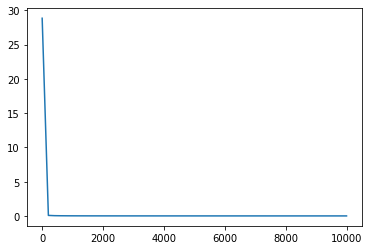

In [21]:
import matplotlib.pyplot as plt
import numpy as np

ts = np.linspace(1,10000)
accs = [foo_a(dlt) for dlt in ts]

plt.plot(ts, accs)

In [22]:
accs

[28.844410203711913,
 0.07546231826839721,
 0.038001503937997894,
 0.02539473807196009,
 0.019068750353283044,
 0.01526590654820531,
 0.01272765192915917,
 0.010913129788807962,
 0.009551426604161172,
 0.00849184297411104,
 0.007643872838022689,
 0.006949878550761641,
 0.006371412075972685,
 0.0058818425064611265,
 0.005462139981531269,
 0.005098344425236167,
 0.0047799826572886275,
 0.004499043699689531,
 0.0042492953758810625,
 0.004025816557945651,
 0.0038246696391263,
 0.0036426665217929406,
 0.0034771983853205644,
 0.0033261098346937593,
 0.0031876044931859557,
 0.0030601732398173194,
 0.0029425389982788387,
 0.002833613788478041,
 0.002732464976618969,
 0.0026382885045770008,
 0.0025503874708437207,
 0.002468154855180961,
 0.002391059480953234,
 0.002318634528656246,
 0.0022504680756164296,
 0.0021861952567930453,
 0.0021254917315938083,
 0.0020680682097160108,
 0.002013665841002974,
 0.0019620523142930787,
 0.0019130185412320807,
 0.0018663758252117834,
 0.001821953434608248,
 0

In [18]:
AccD = (-6*(B-A) + 6*(B-A) + 6 * (C-B) - 12*(C-B) + 6 * (D-C))/(delta_t)**2
Eq2 = AccD.dot(AccD)**0.5
np_fooD = sp.lambdify((Ax, Ay, Dx, Dy, VAx, VAy, VDx, VDy,delta_t), Eq2, 'numpy')

In [ ]:
res_teq = sp.solve(Eq1-Eq2, delta_t)

In [36]:
res_accA[2].evalf(subs={
    Ax: 1, 
    Ay:1, 
    
    Dx: 2, 
    Dy: 3, 
    
    
    VAx:-13, 
    VAy:-1, 
    
    VDx: 12, 
    VDy:-2,
    
    Acc_max: 10
})

-2.91295063024394*(0.5*Ax**2/Acc_max**2 - Ax*Dx/Acc_max**2 - 0.666666666666667*Ax*VAx*t1/Acc_max**2 + 0.666666666666667*Ax*VAx*t2/Acc_max**2 - 0.333333333333333*Ax*VDx*t1/Acc_max**2 + 0.333333333333333*Ax*VDx*t2/Acc_max**2 + 0.5*Ay**2/Acc_max**2 - Ay*Dy/Acc_max**2 - 0.666666666666667*Ay*VAy*t1/Acc_max**2 + 0.666666666666667*Ay*VAy*t2/Acc_max**2 - 0.333333333333333*Ay*VDy*t1/Acc_max**2 + 0.333333333333333*Ay*VDy*t2/Acc_max**2 + 0.5*Dx**2/Acc_max**2 + 0.666666666666667*Dx*VAx*t1/Acc_max**2 - 0.666666666666667*Dx*VAx*t2/Acc_max**2 + 0.333333333333333*Dx*VDx*t1/Acc_max**2 - 0.333333333333333*Dx*VDx*t2/Acc_max**2 + 0.5*Dy**2/Acc_max**2 + 0.666666666666667*Dy*VAy*t1/Acc_max**2 - 0.666666666666667*Dy*VAy*t2/Acc_max**2 + 0.333333333333333*Dy*VDy*t1/Acc_max**2 - 0.333333333333333*Dy*VDy*t2/Acc_max**2 + 0.222222222222222*VAx**2*t1**2/Acc_max**2 - 0.444444444444444*VAx**2*t1*t2/Acc_max**2 + 0.222222222222222*VAx**2*t2**2/Acc_max**2 + 0.222222222222222*VAx*VDx*t1**2/Acc_max**2 - 0.444444444444444*